#### Import Libraries

In [635]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import OneClassSVM
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#### Train Data CSV -> Dataframe

In [636]:
df=pd.read_csv('train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### Data Analysis , Statistics And Visualization 

In [637]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [638]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [639]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Column Passenger ID 
##### (A unique identifier assigned to each passenger.)

In [640]:
df['PassengerId'].dtype

dtype('int64')

In [641]:
df['PassengerId'].value_counts().sum()

891

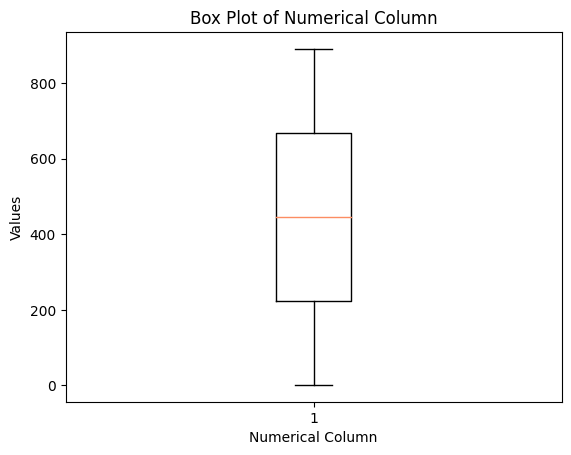

In [642]:
# Create a box plot
plt.boxplot(df['PassengerId'])

# Adding labels and title
plt.xlabel('Numerical Column')
plt.ylabel('Values')
plt.title('Box Plot of Numerical Column')

# Display the plot
plt.show()


#### Column Survived
##### Indicates whether the passenger survived or not. It has two possible values: 0 (did not survive) and 1 (survived).

In [643]:
df['Survived'].dtype

dtype('int64')

In [644]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [645]:
df['Survived'].isnull().sum()

0

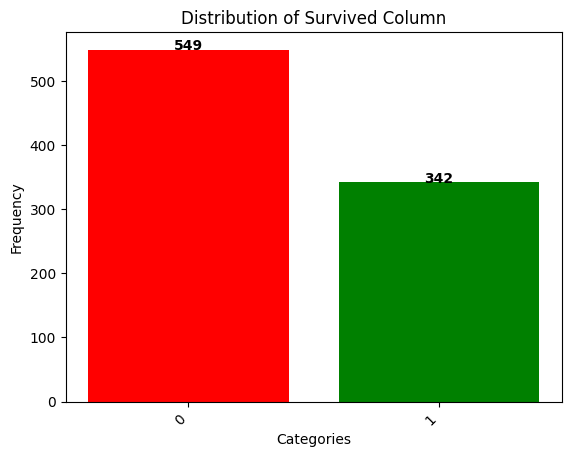

In [646]:
value_counts = df['Survived'].value_counts()

# Define custom colors
colors = ['red', 'green']

# Create a bar plot
plt.bar(value_counts.index, value_counts.values, color=colors)

# Displaying count on top of each bar
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', color='black', fontweight='bold')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Survived Column')

# Adding category names below the bars
plt.xticks(range(len(value_counts.index)), value_counts.index)
plt.gca().set_xticklabels(value_counts.index, rotation=45, ha='right')

# Display the plot
plt.show()


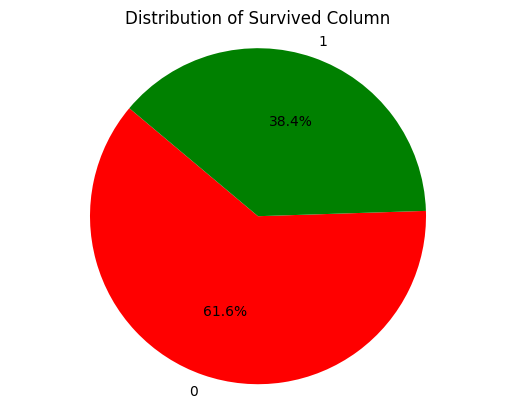

In [647]:
# Count the frequency of each unique category in the categorical column
value_counts = df['Survived'].value_counts()

# Custom colors for red and green
colors = ['red', 'green']

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding title
plt.title('Distribution of Survived Column')

# Display the plot
plt.show()


#### Column Pclass
##### Represents the class of the ticket the passenger purchased. It has three possible values: 1 (First Class), 2 (Second Class), and 3 (Third Class).

In [648]:
df['Pclass'].dtype

dtype('int64')

In [649]:
df['Pclass'].count()

891

In [650]:
df['Pclass'].isnull().sum()

0

In [651]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

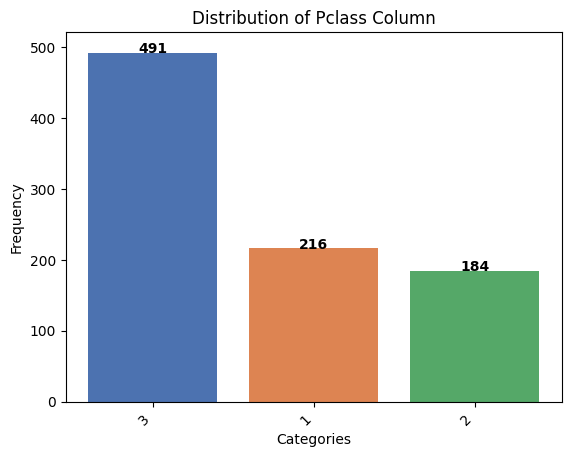

In [652]:
# Count the frequency of each unique category
value_counts = df['Pclass'].value_counts()

# Use a custom color palette
custom_palette = sns.color_palette("deep")  # You can use different palette names

# Create a bar plot
plt.bar(range(len(value_counts.index)), value_counts.values, color=custom_palette)

# Displaying count on top of each bar
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', color='black', fontweight='bold')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Pclass Column')

# Adding category names below the bars
plt.xticks(range(len(value_counts.index)), value_counts.index)
plt.gca().set_xticklabels(value_counts.index, rotation=45, ha='right')

# Adjust y-axis limits to accommodate text
plt.ylim(0, max(value_counts.values) + 30)

# Display the plot
plt.show()


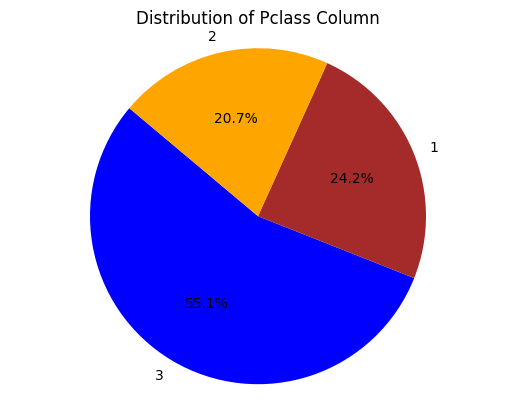

In [653]:
# Count the frequency of each unique category in the categorical column
value_counts = df['Pclass'].value_counts()

# Custom colors for blue shades
colors = ['blue','brown','orange']  # Three shades of blue

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding title
plt.title('Distribution of Pclass Column')

# Display the plot
plt.show()


#### Column Name
##### The name of the passenger.

In [654]:
df['Name'].count()

891

In [655]:
df['Name'].isnull().count()

891

In [656]:
df['Name'].dtype

dtype('O')

#### Column Sex
#####  The gender of the passenger, either "male" or "female".


In [657]:
df['Sex'].dtype

dtype('O')

In [658]:
df['Sex'].count()

891

In [659]:
df['Sex'].isnull().sum()

0

In [660]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

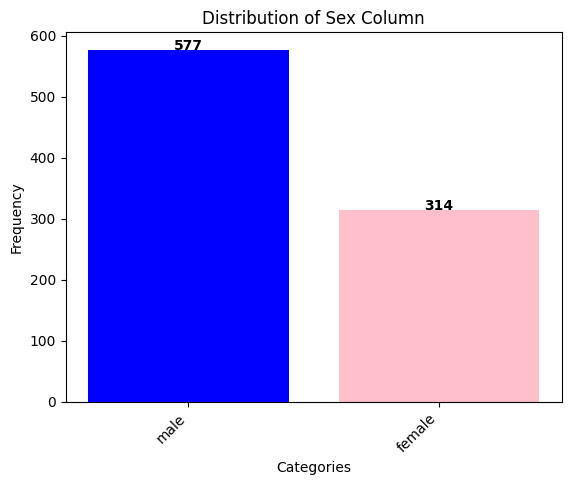

In [661]:
# Count the frequency of each unique category
value_counts = df['Sex'].value_counts()

# Define custom colors
colors = ['blue', 'pink']

# Create a bar plot
plt.bar(value_counts.index, value_counts.values, color=colors)

# Displaying count on top of each bar
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', color='black', fontweight='bold')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Sex Column')

# Adding category names below the bars
plt.xticks(range(len(value_counts.index)), value_counts.index)
plt.gca().set_xticklabels(value_counts.index, rotation=45, ha='right')

# Display the plot
plt.show()


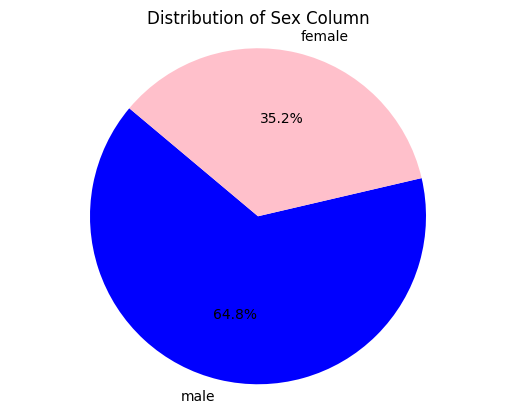

In [662]:
# Count the frequency of each unique category in the categorical column
value_counts = df['Sex'].value_counts()

# Custom colors for red and green
colors = ['blue', 'pink']

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding title
plt.title('Distribution of Sex Column')

# Display the plot
plt.show()


#### Column Age
##### The age of the passenger. It can be a fractional value if the age is estimated.

In [663]:
df['Age'].dtypes

dtype('float64')

In [664]:
df['Age'].count()

714

In [665]:
df['Age'].isnull().sum()

177

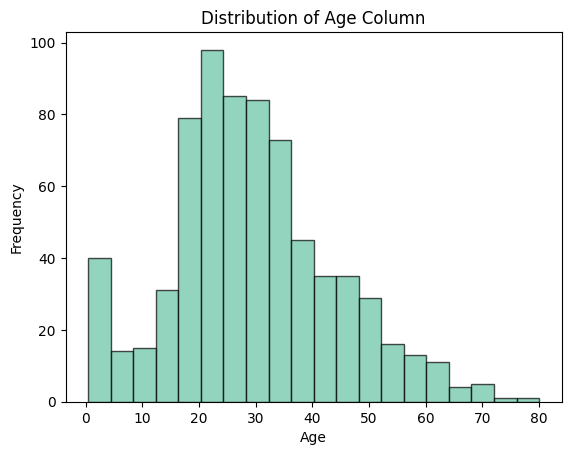

In [666]:
# Create a histogram
plt.hist(df['Age'], bins=20, edgecolor='k', alpha=0.7)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age Column')

# Display the plot
plt.show()


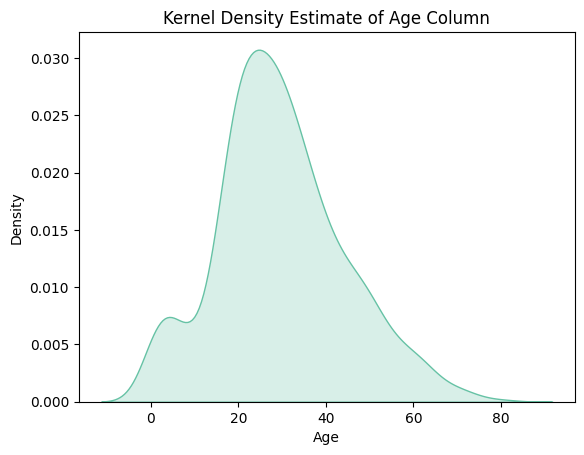

In [667]:
# Create a KDE plot
sns.kdeplot(data=df, x='Age', fill=True)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Age Column')

# Display the plot
plt.show()


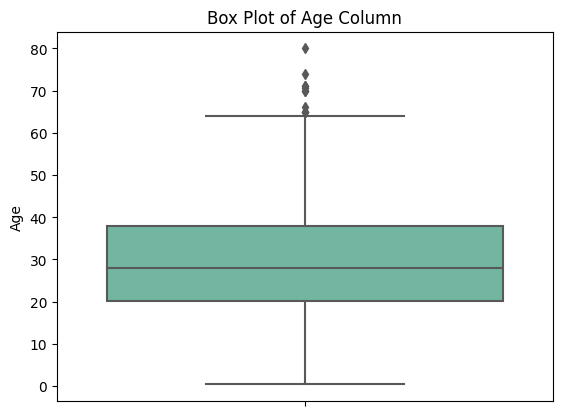

In [668]:
# Create a box plot
sns.boxplot(data=df, y='Age')

# Adding labels and title
plt.ylabel('Age')
plt.title('Box Plot of Age Column')

# Display the plot
plt.show()


In [669]:
df['Age'].max()

80.0

In [670]:
df['Age'].min()

0.42

In [671]:
# Replace missing values with the median age
median_age = df['Age'].median() 
df['Age'].fillna(median_age, inplace=True)


In [672]:
df['Age'].count()

891

In [673]:
df['Age'].isnull().sum()

0

#### Column SibSp(SiblingSpouse)
##### The number of siblings or spouses the passenger had aboard the Titanic.

In [674]:
df['SibSp'].dtypes

dtype('int64')

In [675]:
df['SibSp'].count()

891

In [676]:
df['SibSp'].isnull().sum()

0

In [677]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

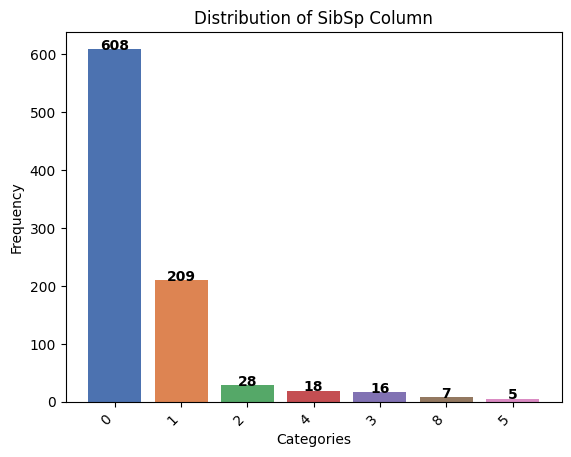

In [678]:
# Count the frequency of each unique category
value_counts = df['SibSp'].value_counts()

# Use a custom color palette
custom_palette = sns.color_palette("deep")  # You can use different palette names

# Create a bar plot
plt.bar(range(len(value_counts.index)), value_counts.values, color=custom_palette)

# Displaying count on top of each bar
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', color='black', fontweight='bold')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of SibSp Column')

# Adding category names below the bars
plt.xticks(range(len(value_counts.index)), value_counts.index)
plt.gca().set_xticklabels(value_counts.index, rotation=45, ha='right')

# Adjust y-axis limits to accommodate text
plt.ylim(0, max(value_counts.values) + 30)

# Display the plot
plt.show()


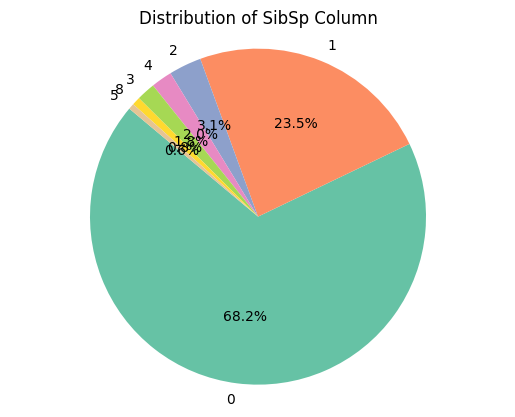

In [679]:
# Count the frequency of each unique category in the 'Survived' column
value_counts = df['SibSp'].value_counts()

# Use Seaborn's color palette for the pie chart
sns.set_palette("Set2")

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding title
plt.title('Distribution of SibSp Column')

# Display the plot
plt.show()


#### Column Parch( ParentChild)
##### The number of parents or children the passenger had aboard the Titanic.


In [680]:
df['Parch'].dtypes

dtype('int64')

In [681]:
df['Parch'].count()

891

In [682]:
df['Parch'].isnull().sum()

0

In [683]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

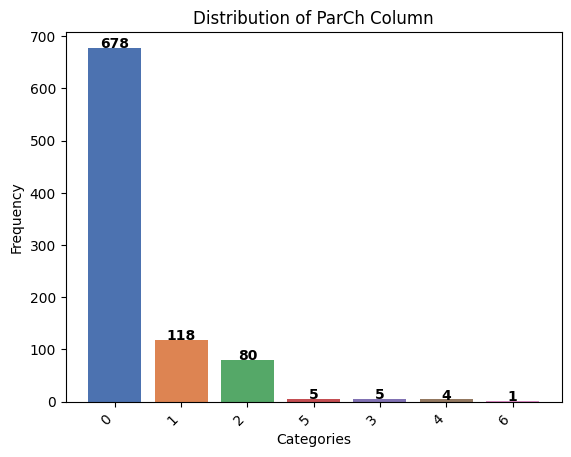

In [684]:
# Count the frequency of each unique category
value_counts = df['Parch'].value_counts()

# Use a custom color palette
custom_palette = sns.color_palette("deep")  # You can use different palette names

# Create a bar plot
plt.bar(range(len(value_counts.index)), value_counts.values, color=custom_palette)

# Displaying count on top of each bar
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', color='black', fontweight='bold')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of ParCh Column')

# Adding category names below the bars
plt.xticks(range(len(value_counts.index)), value_counts.index)
plt.gca().set_xticklabels(value_counts.index, rotation=45, ha='right')

# Adjust y-axis limits to accommodate text
plt.ylim(0, max(value_counts.values) + 30)

# Display the plot
plt.show()


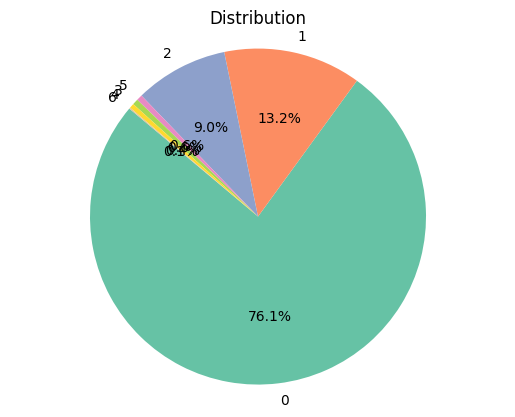

In [685]:
# Count the frequency of each unique category in the 'Survived' column
value_counts = df['Parch'].value_counts()

# Use Seaborn's color palette for the pie chart
sns.set_palette("Set2")

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding title
plt.title('Distribution')

# Display the plot
plt.show()


#### Column Ticket
##### The ticket number assigned to the passenger.

In [686]:
df['Ticket'].dtype

dtype('O')

In [687]:
df['Ticket'].count()

891

In [688]:
df['Ticket'].isnull().sum()

0

#### Column Fare
##### The amount of money the passenger paid for the ticket.

In [689]:
df['Fare'].count()

891

In [690]:
df['Fare'].isnull().sum()

0

In [691]:
df['Fare'].dtype

dtype('float64')

In [692]:
df['Fare'].max()

512.3292

In [693]:
df['Fare'].min()

0.0

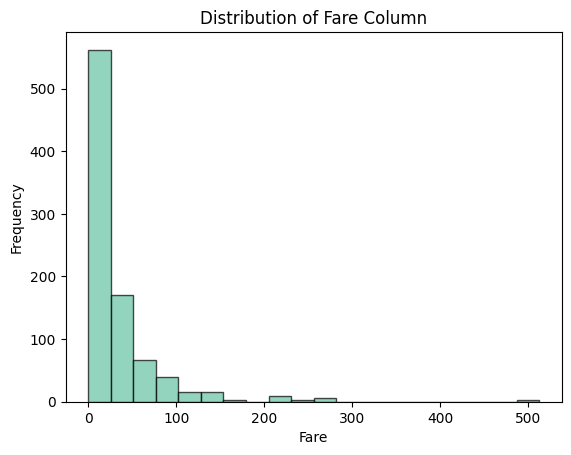

In [694]:
# Create a histogram
plt.hist(df['Fare'], bins=20, edgecolor='k', alpha=0.7)

# Adding labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Column')

# Display the plot
plt.show()


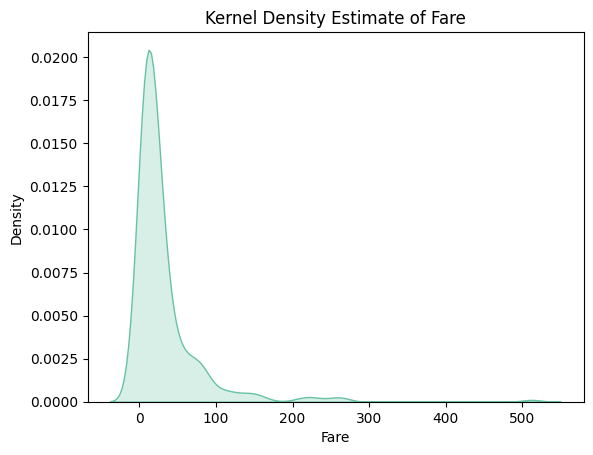

In [695]:
# Create a KDE plot
sns.kdeplot(data=df, x='Fare', fill=True)

# Adding labels and title
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Fare')

# Display the plot
plt.show()


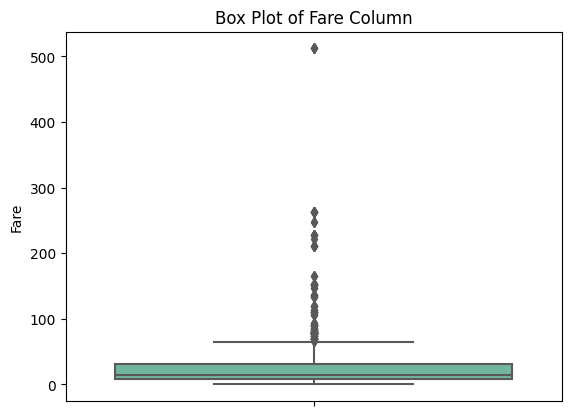

In [696]:
# Create a box plot
sns.boxplot(data=df, y='Fare')

# Adding labels and title
plt.ylabel('Fare')
plt.title('Box Plot of Fare Column')

# Display the plot
plt.show()


#### Cabin
##### The cabin number where the passenger stayed.

In [697]:
df['Cabin'].dtype

dtype('O')

In [698]:
df['Cabin'].count()

204

In [699]:
df['Cabin'].isnull().sum()

687

#### Embarked 
##### The port where the passenger boarded the ship. It has three possible values: "C" (Cherbourg), "Q" (Queenstown), and "S" (Southampton).

In [700]:
df['Embarked'].dtype

dtype('O')

In [701]:
df['Embarked'].count()

889

In [702]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [703]:
df['Embarked'].isnull().sum()

2

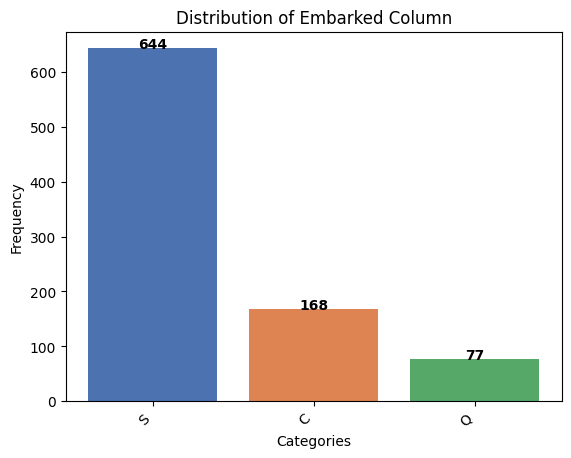

In [704]:
# Count the frequency of each unique category
value_counts = df['Embarked'].value_counts()

# Use a custom color palette
custom_palette = sns.color_palette("deep")  # You can use different palette names

# Create a bar plot
plt.bar(range(len(value_counts.index)), value_counts.values, color=custom_palette)

# Displaying count on top of each bar
for i, count in enumerate(value_counts.values):
    plt.text(i, count + 0.2, str(count), ha='center', color='black', fontweight='bold')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Embarked Column')

# Adding category names below the bars
plt.xticks(range(len(value_counts.index)), value_counts.index)
plt.gca().set_xticklabels(value_counts.index, rotation=45, ha='right')

# Adjust y-axis limits to accommodate text
plt.ylim(0, max(value_counts.values) + 30)

# Display the plot
plt.show()


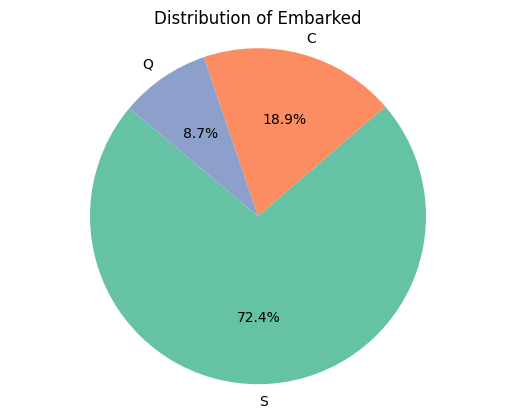

In [705]:
# Count the frequency of each unique category in the 'Survived' column
value_counts = df['Embarked'].value_counts()

# Use Seaborn's color palette for the pie chart
sns.set_palette("Set2")

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding title
plt.title('Distribution of Embarked')

# Display the plot
plt.show()


In [706]:
# Replace missing values with the mode embarked
mode_embarked = df['Embarked'].mode().iloc[0]
df['Embarked']=df['Embarked'].fillna(mode_embarked)


In [707]:
df['Embarked'].count()

891

In [708]:
df['Embarked'].isnull().sum()

0

In [709]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Data Transformation

#### Encoding categorical output

In [710]:
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])

#### Split train and test data

In [711]:
#Input Independent Features
X=df.drop('Survived',axis=1)

In [712]:
#Output Independent Feature
y=df['Survived']

In [713]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [714]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Feature Selection

In [715]:
X=X.drop('Name',axis=1)
X=X.drop('Ticket',axis=1)
X=X.drop('Cabin',axis=1)

In [716]:
categorical_cols = ['Pclass', 'Sex','SibSp','Parch','Embarked']
numerical_cols = ['PassengerId', 'Age','Fare']

In [717]:
## Feature Engineering Automation

#non-categorical Pipeline
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')), ##missing values
        ('scaler',StandardScaler())## feature scaling 
    ]

)

#categorical Pipeline
cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')), ## handling Missing values
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
                ]

            )  

In [718]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)

])

In [719]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [720]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        # Train model
        model.fit(X_train,y_train)

            

        # Predict Testing data
        y_test_pred =model.predict(X_test)

        # Get accuracy for test data prediction
       
        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] =  test_model_score
            
    return report

In [721]:
# Define individual models
random_forest = RandomForestClassifier()
extra_trees = ExtraTreesClassifier()
gradient_boosting = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()
decision_tree = DecisionTreeClassifier()
svc = SVC()
k_neighbors = KNeighborsClassifier()
gaussian_nb = GaussianNB()
mlp_classifier = MLPClassifier()
lda = LinearDiscriminantAnalysis()
logistic_regression = LogisticRegression()
ridge_classifier = RidgeClassifier()
perceptron = Perceptron()
passive_aggressive_classifier = PassiveAggressiveClassifier()
gaussian_process_classifier = GaussianProcessClassifier()
one_class_svm = OneClassSVM()
nearest_centroid = NearestCentroid()
isolation_forest = IsolationForest()

# Dictionary of models
models = {
    'Random Forest': random_forest,
    'Extra Trees': extra_trees,
    'Gradient Boosting': gradient_boosting,
    'AdaBoost': ada_boost,
    'Decision Tree': decision_tree,
    'SVC': svc,
    'KNeighbors': k_neighbors,
    'Gaussian Naive Bayes': gaussian_nb,
    'MLP Classifier': mlp_classifier,
    'Linear Discriminant Analysis': lda,
    'Logistic Regression': logistic_regression,
    'Ridge Classifier': ridge_classifier,
    'Perceptron': perceptron,
    'Passive Aggressive Classifier': passive_aggressive_classifier,
    'Gaussian Process Classifier': gaussian_process_classifier,
    'Nearest Centroid': nearest_centroid
}



In [722]:
def evaluate_model(X_train, y_train, X_test, y_test, models):
    best_model_name = None
    best_accuracy = 0.0
    
    for name, model in models.items():
        # Perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        avg_accuracy = scores.mean()
        
        print(f'{name}: Cross-Validation Accuracy = {avg_accuracy:.2f}')
        
        # Train the model on the entire training set
        model.fit(X_train, y_train)
        
        # Evaluate the model on the test set
        test_accuracy = model.score(X_test, y_test)
        print(f'{name}: Test Accuracy = {test_accuracy:.2f}\n')
        
        # Update best model if necessary
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model_name = name
    
    return best_model_name

best_model = evaluate_model(X_train, y_train, X_test, y_test, models)
print(f'Best Model: {best_model}')


Random Forest: Cross-Validation Accuracy = 0.79
Random Forest: Test Accuracy = 0.81



Extra Trees: Cross-Validation Accuracy = 0.77
Extra Trees: Test Accuracy = 0.82

Gradient Boosting: Cross-Validation Accuracy = 0.82
Gradient Boosting: Test Accuracy = 0.80

AdaBoost: Cross-Validation Accuracy = 0.79
AdaBoost: Test Accuracy = 0.80

Decision Tree: Cross-Validation Accuracy = 0.72
Decision Tree: Test Accuracy = 0.77

SVC: Cross-Validation Accuracy = 0.82
SVC: Test Accuracy = 0.81

KNeighbors: Cross-Validation Accuracy = 0.78
KNeighbors: Test Accuracy = 0.82

Gaussian Naive Bayes: Cross-Validation Accuracy = 0.41
Gaussian Naive Bayes: Test Accuracy = 0.42



c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

MLP Classifier: Cross-Validation Accuracy = 0.80


c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier: Test Accuracy = 0.78

Linear Discriminant Analysis: Cross-Validation Accuracy = 0.79
Linear Discriminant Analysis: Test Accuracy = 0.80

Logistic Regression: Cross-Validation Accuracy = 0.80
Logistic Regression: Test Accuracy = 0.80

Ridge Classifier: Cross-Validation Accuracy = 0.79
Ridge Classifier: Test Accuracy = 0.80

Perceptron: Cross-Validation Accuracy = 0.74
Perceptron: Test Accuracy = 0.77

Passive Aggressive Classifier: Cross-Validation Accuracy = 0.72
Passive Aggressive Classifier: Test Accuracy = 0.76

Gaussian Process Classifier: Cross-Validation Accuracy = 0.80
Gaussian Process Classifier: Test Accuracy = 0.80

Nearest Centroid: Cross-Validation Accuracy = 0.78
Nearest Centroid: Test Accuracy = 0.78

Best Model: Extra Trees


In [723]:
best_model=ExtraTreesClassifier()

In [724]:
# Train (fit) the model
best_model.fit(X_train, y_train)


ExtraTreesClassifier()

In [725]:
# Now make predictions
y_pred = best_model.predict(X_test)

In [726]:
score=accuracy_score(y_pred,y_test)
print(score*100)
print(classification_report(y_pred,y_test))

82.68156424581005
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.76      0.81      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



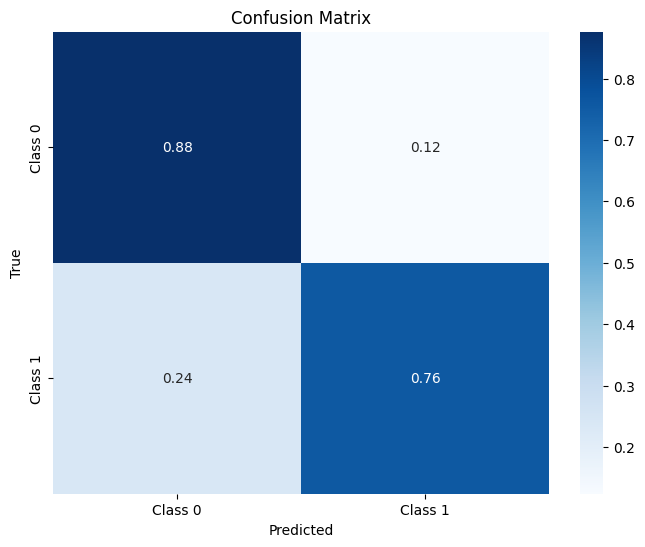

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Training Score: 1.00
Validation Score: 0.83
Training Error: 0.00
Validation Error: 0.17


In [727]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

def plot_learning_curve(model, X, y, train_sizes, title=None):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train', marker='o')
    plt.plot(train_sizes, test_scores_mean, label='Validation', marker='o')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.show()

# Assuming you've trained a model named 'best_model' and have X_train, y_train, X_test, y_test
# Replace 'best_model' with your actual trained model

# Plot confusion matrix
plot_confusion_matrix(y_test, best_model.predict(X_test), classes=['Class 0', 'Class 1'], normalize=True, title='Confusion Matrix')


# Print classification report
print(classification_report(y_test, best_model.predict(X_test)))

# Other relevant statistics
train_score = best_model.score(X_train, y_train)
validation_score = best_model.score(X_test, y_test)
train_error = 1 - train_score
validation_error = 1 - validation_score

print(f'Training Score: {train_score:.2f}')
print(f'Validation Score: {validation_score:.2f}')
print(f'Training Error: {train_error:.2f}')
print(f'Validation Error: {validation_error:.2f}')


#### Test CSV 

In [728]:
test_data = pd.read_csv('test.csv')

In [729]:
X_test_data = test_data

In [730]:
# Extract features from the test data
X_test_data.drop('Name',axis=1,inplace=True) # Replace with the actual target_column name
X_test_data.drop('Ticket',axis=1,inplace=True)
X_test_data.drop('Cabin',axis=1,inplace=True)


In [731]:
X_test_data=preprocessor.transform(X_test_data)

In [732]:
# Make predictions
test_predictions = best_model.predict(X_test_data)

In [733]:
# Create a new DataFrame or Series to hold the predicted values
predictions_df = pd.DataFrame({'predictions': test_predictions})

In [734]:
final_df=pd.DataFrame()
final_df['PassengerId'] = test_data['PassengerId']
final_df['Survived'] = predictions_df ['predictions']

In [736]:
# Save the DataFrame with predictions to a CSV file
final_df.to_csv('test_predictions.csv', index=False)